<a href="https://colab.research.google.com/github/31indianaSKKU/SportsBigDataAnalysis_2022FALL/blob/main/COCOPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

pycocotools 을 이용한 COCO dataset 살펴보기

In [ ]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

Annotation
2017 Train/Val annotations [241MB] http://images.cocodataset.org/annotations/annotations_trainval2017.zip

Images
2017 Val images [5K/1GB] http://images.cocodataset.org/zips/val2017.zip

In [126]:
#colab은 내컴퓨터에서 바로 파일을 못불러 오는 듯!!
#따라서 구글drive에 파일 올려놓고 colab과 연동!!!

In [114]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
import os # Miscellaneous operating system interfaces

In [116]:
os.chdir("/content/drive/MyDrive/MyPc/COCO2D")

In [117]:
os.getcwd()

'/content/drive/MyDrive/MyPc/COCO2D'

In [118]:
dataDir = 'annotations_trainval2017'
loc = '{}/annotations/'.format(dataDir)

In [119]:
loc

'annotations_trainval2017/annotations/'

In [120]:
!ls $loc

captions_train2017.json   instances_val2017.json
captions_val2017.json	  person_keypoints_train2017.json
instances_train2017.json  person_keypoints_val2017.json


Annotation - instances

In [121]:
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [122]:
annFile

'annotations_trainval2017/annotations/instances_val2017.json'

In [123]:
#!head $annFile

In [124]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=1.43s)
creating index...
index created!


In [125]:
coco

In [127]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())

In [128]:
len(cats)    #categories 갯수 조회

80

In [129]:
cats     #categories 출력

[{'supercategory': 'person', 'id': 1, 'name': 'person'},
 {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
 {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
 {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'},
 {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'},
 {'supercategory': 'vehicle', 'id': 7, 'name': 'train'},
 {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'},
 {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'},
 {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'},
 {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'},
 {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'},
 {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'},
 {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'},
 {'supercategory': 'animal', 'id': 16, 'name': 'bird'},
 {'supercategory': 'animal', 'id': 17, 'name': 'cat'},
 {'supercategory': 'animal', 'id': 18, 'name': 'dog'},

In [130]:
#cats

In [131]:
cats[3]   #categories의 4번째 값 출력

{'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'}

In [132]:
cats[3]['supercategory']    #categories의 4번째 값의 supercategories 출력

'vehicle'

In [133]:
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))      #catagories 출력

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush



In [134]:
nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))     #supercategories 출력

COCO supercategories: 
furniture person animal sports accessory food kitchen electronic outdoor appliance vehicle indoor


Get img ids that satisfy given filter conditions.

In [135]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);   #'person','dog','skateboard'가 포함된 사진의 카테고리 번호 조회

In [136]:
catIds     #id_1 = 'person', id_18 = 'dog', id_41 = 'skateboard'

[1, 18, 41]

In [137]:
imgIds = coco.getImgIds(catIds=catIds )
print(imgIds)    #5000장의 사진 중 위에서 지정한 'person','dog','skateboard'가 포함된 사진의 id 조회 및 출력

[549220, 324158, 279278]


In [138]:
imgIds = coco.getImgIds(imgIds = [imgIds[1]])   #위에 3장 중 두 번째 사진 id출력
print(imgIds)

[324158]


In [139]:
#imgIds = coco.getImgIds(catIds=catIds );
#imgIds = coco.getImgIds(imgIds = [324158])
#img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
img = coco.loadImgs(imgIds)[0]

In [140]:
img    #파일 정보 출력

{'license': 1,
 'file_name': '000000324158.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000324158.jpg',
 'height': 334,
 'width': 500,
 'date_captured': '2013-11-19 23:54:06',
 'flickr_url': 'http://farm1.staticflickr.com/169/417836491_5bf8762150_z.jpg',
 'id': 324158}

In [141]:
img['id']

324158

In [142]:
img['file_name']

'000000324158.jpg'

In [143]:
img['coco_url']

'http://images.cocodataset.org/val2017/000000324158.jpg'

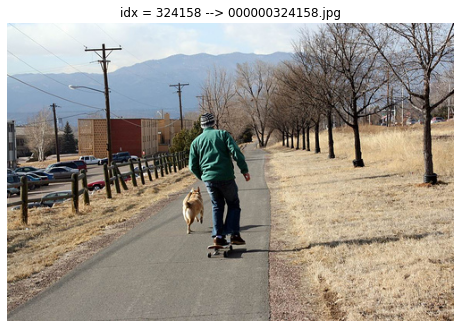

In [144]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.title('idx = {} --> {}'.format(img['id'], img['file_name']))
plt.show()

Get ann ids that satisfy given filter conditions.

In [145]:
print('이미지 id가 {} 이고 catIds가 {} 인 정보를 기술하는 주석(annotation)을 기술하는 Id 찾기'.format(img['id'], catIds))

이미지 id가 324158 이고 catIds가 [1, 18, 41] 인 정보를 기술하는 주석(annotation)을 기술하는 Id 찾기


In [146]:
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds)

In [147]:
annIds

[10673, 638724, 2162813]

왜 3개가 나왔을까? 위의 id가 어떤 것을 annotation하고 있는지 살펴보자. --> 이미지의 id가 아니고 주석(annotation)의 id 임!!

In [148]:
anns = coco.loadAnns(annIds)

In [149]:
len(anns)

3

In [150]:
anns

[{'segmentation': [[216.7,
    211.89,
    216.16,
    217.81,
    215.89,
    220.77,
    215.89,
    223.73,
    217.77,
    225.35,
    219.12,
    224.54,
    219.12,
    220.5,
    219.66,
    217.27,
    219.93,
    212.7,
    220.46,
    207.85,
    219.66,
    203.01,
    218.85,
    198.43,
    217.77,
    195.74,
    216.7,
    194.93,
    215.62,
    190.62,
    215.62,
    186.59,
    214.27,
    183.89,
    211.85,
    184.16,
    211.85,
    187.66,
    210.24,
    187.66,
    209.16,
    184.97,
    207.81,
    183.36,
    205.12,
    186.59,
    205.12,
    189.28,
    201.08,
    192.78,
    199.74,
    195.2,
    196.78,
    200.04,
    196.51,
    203.01,
    198.12,
    205.43,
    197.32,
    209.2,
    196.78,
    213.23,
    197.05,
    218.89,
    199.74,
    221.85,
    201.62,
    225.35,
    201.62,
    233.69,
    201.08,
    236.11,
    202.97,
    236.38,
    204.85,
    236.11,
    204.58,
    232.34,
    203.78,
    228.85,
    205.39,
    233.15,
    20

In [152]:
anns[0]  #각각 x,y의 좌표를 표시해줌!

{'segmentation': [[216.7,
   211.89,
   216.16,
   217.81,
   215.89,
   220.77,
   215.89,
   223.73,
   217.77,
   225.35,
   219.12,
   224.54,
   219.12,
   220.5,
   219.66,
   217.27,
   219.93,
   212.7,
   220.46,
   207.85,
   219.66,
   203.01,
   218.85,
   198.43,
   217.77,
   195.74,
   216.7,
   194.93,
   215.62,
   190.62,
   215.62,
   186.59,
   214.27,
   183.89,
   211.85,
   184.16,
   211.85,
   187.66,
   210.24,
   187.66,
   209.16,
   184.97,
   207.81,
   183.36,
   205.12,
   186.59,
   205.12,
   189.28,
   201.08,
   192.78,
   199.74,
   195.2,
   196.78,
   200.04,
   196.51,
   203.01,
   198.12,
   205.43,
   197.32,
   209.2,
   196.78,
   213.23,
   197.05,
   218.89,
   199.74,
   221.85,
   201.62,
   225.35,
   201.62,
   233.69,
   201.08,
   236.11,
   202.97,
   236.38,
   204.85,
   236.11,
   204.58,
   232.34,
   203.78,
   228.85,
   205.39,
   233.15,
   207.81,
   235.57,
   208.62,
   234.23,
   206.74,
   231.27,
   205.12,
   228.04,


In [153]:
seg = anns[2]['segmentation'] #2 for person (2가 사람과 관련된 것 )

In [154]:
np.shape(seg)

(1, 52)

In [156]:
seg_x = seg[0][::2] #x     #::2(=0::2)는 0,2,4,8,....
seg_y = seg[0][1::2] #y    #1::2는 1부터 1,3,5,7,9,...

(199.121, 278.079, 88.893, 257.347)

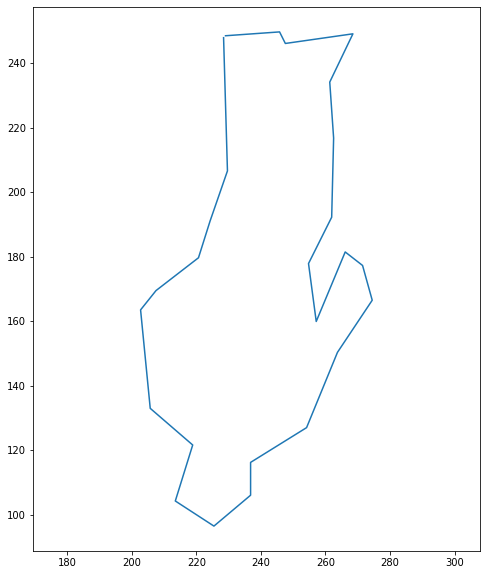

In [157]:
plt.plot(seg_x, seg_y)
plt.axis('equal')

In [158]:
import os
#img_disp = plt.imread(img['coco_url'])
img_disp = plt.imread(os.path.join('./val2017', img['file_name']))

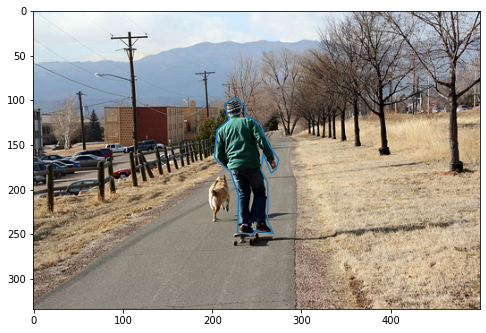

In [159]:
plt.imshow(img_disp)
plt.plot(seg_x, seg_y)
#plt.axis('equal')

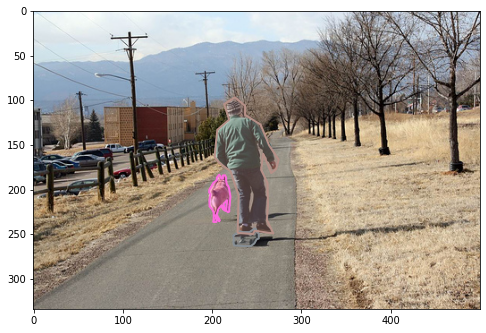

In [160]:
plt.figure()
plt.imshow(I)
coco.showAnns(anns)

Annotations - Keypoints

In [161]:
dataDir, dataType

('annotations_trainval2017', 'val2017')

In [162]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
print(annFile)

annotations_trainval2017/annotations/person_keypoints_val2017.json


In [163]:
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=1.04s)
creating index...
index created!


In [164]:
img['id']

324158

In [165]:
catIds

[1, 18, 41]

In [166]:
annIds = coco_kps.getAnnIds(imgIds=img['id'], iscrowd=None)   #AnnIds : annotation id
print(annIds)

[2162813]


In [167]:
anns = coco_kps.loadAnns(annIds)

In [170]:
anns        #결과의 keypoints를 보면 처음에 0,0,0,0,0,....인데 이유는 keypoint파일에 보면 확인할 수 있지만 코부터 왼쪽 귀....이런 순서로 포인트가 태깅되는데 해당 사진은 뒷모습이므로 귀와 코 등이 태깅이 되지 않았기 때문임!!

[{'segmentation': [[228.43,
    247.9,
    229.63,
    206.62,
    224.24,
    191.07,
    220.65,
    179.7,
    207.49,
    169.53,
    202.71,
    163.55,
    205.7,
    133.04,
    218.86,
    121.68,
    213.47,
    104.33,
    225.44,
    96.55,
    236.8,
    106.12,
    236.8,
    116.29,
    254.15,
    127.06,
    263.72,
    150.39,
    274.49,
    166.54,
    271.5,
    177.31,
    266.12,
    181.5,
    257.14,
    159.96,
    254.75,
    177.91,
    261.93,
    192.27,
    262.53,
    216.79,
    261.33,
    234.14,
    268.51,
    249.1,
    247.57,
    246.11,
    245.78,
    249.69,
    229.03,
    248.5]],
  'num_keypoints': 12,
  'area': 5999.5445,
  'iscrowd': 0,
  'keypoints': [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   212,
   135,
   2,
   241,
   125,
   2,
   209,
   162,
   2,
   257,
   146,
   2,
   218,
   172,
   2,
   267,
   167,
   2,
   225,
   177,
   2,
   247,
   176,
   2,
   235,
   203,
   2,
   254,

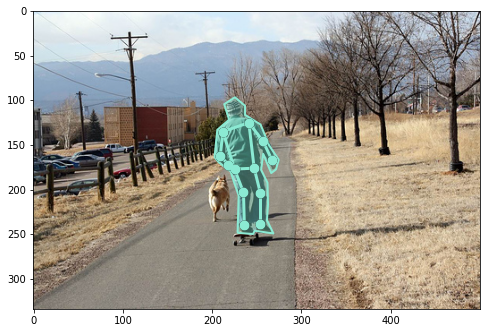

In [169]:
plt.imshow(I)
coco_kps.showAnns(anns)

In [171]:
seg_kf = anns[0]['segmentation']

(199.121, 278.079, 88.893, 257.347)

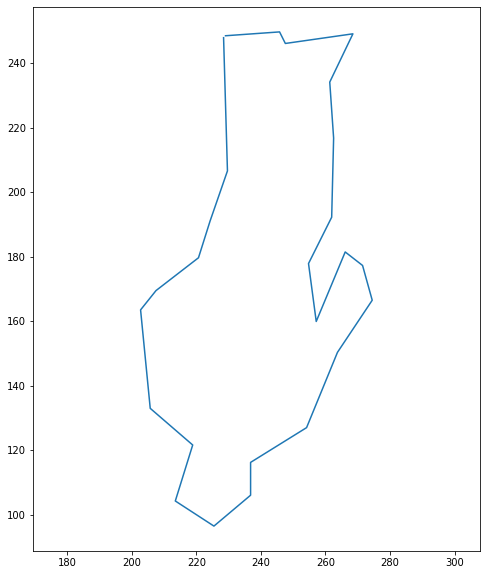

In [172]:
seg_kf_x = seg_kf[0][::2]
seg_kf_y = seg_kf[0][1::2]

plt.plot(seg_kf_x, seg_kf_y)
#plt.plot(seg_x, seg_y, '.')
plt.axis('equal')

In [173]:
kpts = anns[0]['keypoints']    #사람이 한 명이라 [0].  사진에 사람이 두명이라면 [0],[1] 이런식으로.

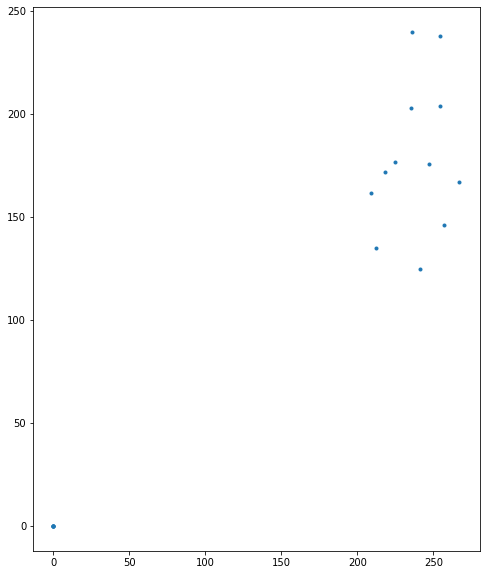

In [174]:
kpts_x = kpts[::3] # 0, 3, 6, ...
kpts_y = kpts[1::3] # 1, 4, 7, ...

plt.plot(kpts_x, kpts_y, '.')

Annotations - captions

In [175]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
print(annFile)

annotations_trainval2017/annotations/captions_val2017.json


In [176]:
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.33s)
creating index...
index created!


In [177]:
annIds = coco_caps.getAnnIds(imgIds=img['id'])

In [178]:
anns = coco_caps.loadAnns(annIds)

In [179]:
anns

[{'image_id': 324158,
  'id': 310079,
  'caption': 'A man is skate boarding down a path and a dog is running by his side.'},
 {'image_id': 324158,
  'id': 311105,
  'caption': 'A man on a skateboard with a dog outside. '},
 {'image_id': 324158,
  'id': 311588,
  'caption': 'A person riding a skate board with a dog following beside.'},
 {'image_id': 324158,
  'id': 312677,
  'caption': 'This man is riding a skateboard behind a dog.'},
 {'image_id': 324158,
  'id': 312860,
  'caption': 'A man walking his dog on a quiet country road.'}]

References

https://cocodataset.org/#download

https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoDemo.ipynb